# Project 4: Heart Disease Prediction (Classification) 🩺


### **Theoretical Concept: What is Classification?**

Classification is a type of supervised machine learning task where the goal is to predict a **discrete category or class label**. This is different from regression, where we predict a continuous numerical value.

**Classification vs. Regression:**
- **Classification:** Is this email spam or not spam? (Two classes)
- **Regression:** What will be the price of this house? (Continuous value)

In this project, our goal is to predict one of two classes for a patient: `0` (No Heart Disease) or `1` (Has Heart Disease). This is a **binary classification** problem.

### Step 1: Setup - Importing Libraries and Loading Data

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
# Set plot style
sns.set_style('whitegrid')

In [36]:
# Download the dataset using the Kaggle Hub API
print("Downloading dataset...")
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

# Load the dataset from the downloaded path
file_path = f'{path}/heart_disease_uci.csv'
df = pd.read_csv(file_path)

print("Dataset downloaded and loaded successfully.")
print(f"Data shape: {df.shape}")
df.head()

Using Colab cache for faster access to the 'heart-disease-data' dataset.
Dataset downloaded and loaded successfully.
Data shape: (920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### Step 2: Exploratory Data Analysis (EDA)

Before building any models, we need to understand our data deeply. We'll look at the distribution of our target variable, the characteristics of our features, and how they relate to the presence of heart disease.

In [37]:
# Initial inspection
print("Dataset Information:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB

Descriptive Statistics:
               id         age    trestbps        chol      thalch     oldpeak  \
co

In [38]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


## Visualization of Distribution of some Categorical Features:

#### 2.1 Analyzing the Target Variable


Distribution of 'sex' and its relation to the Target (Heart Disease).



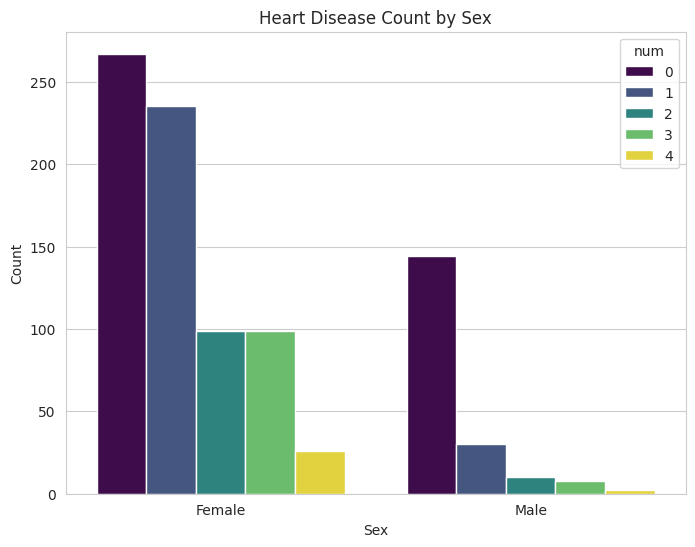

In [39]:
# Analyzing 'sex' vs. 'num'
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='num', data=df, palette='viridis')
plt.title('Heart Disease Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

Distribution of 'cp' (Chest Pain Type) and its relation to the Target (Heart Disease).

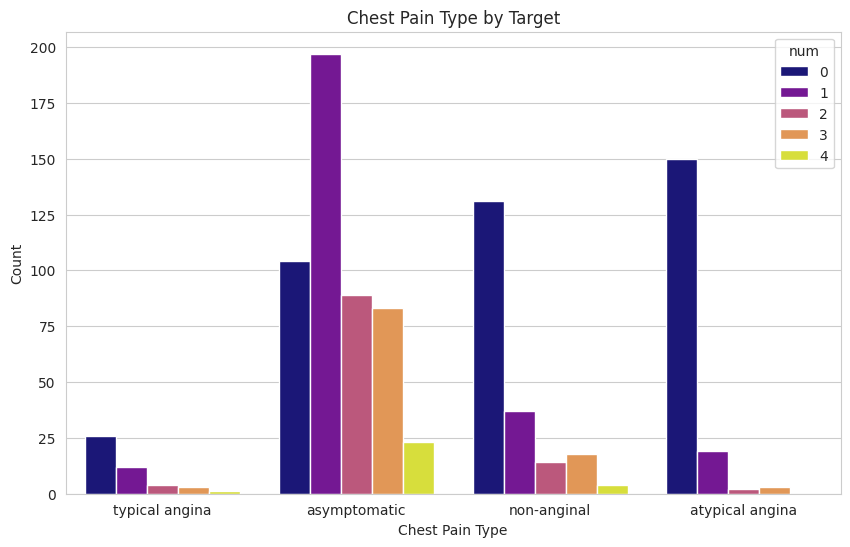

In [40]:
# Analyzing 'cp' vs. 'num'
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='num', data=df, palette='plasma')
plt.title('Chest Pain Type by Target')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

Distribution of Age(Numerical Feature) and its relation to the Target (Heart Disease).

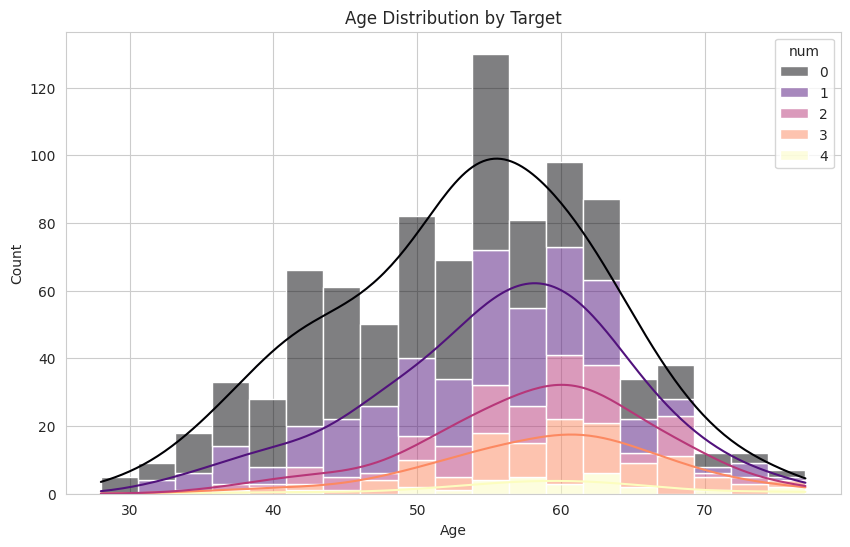

In [41]:
# Analyze 'age' vs. 'num'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='num', multiple='stack', kde=True, palette='magma')
plt.title('Age Distribution by Target')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Distribution of Max Heart Rate(Numeric Feature) by Target (Heart Disease).

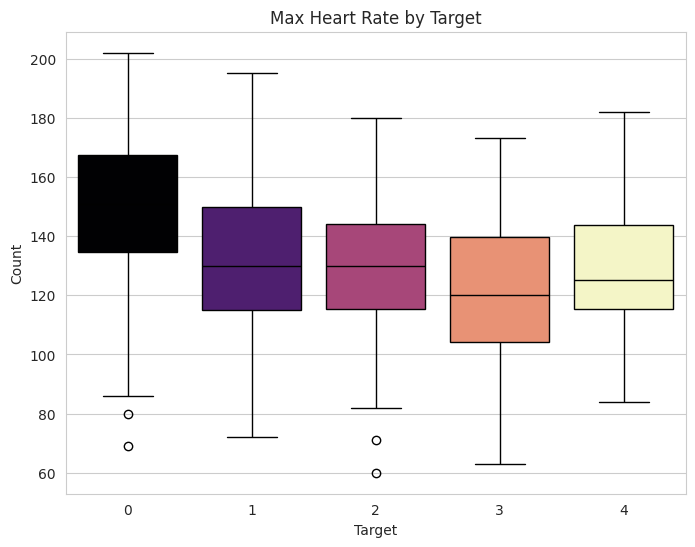

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='num', y='thalch', data=df, palette='magma', hue='num', legend=False)
plt.title('Max Heart Rate by Target')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

**Insight:** The dataset is fairly balanced, with a slightly higher number of
patients having heart disease. This is good because it means our model will have a similar number of examples for both classes to learn from, and accuracy will be a meaningful metric.

#### 2.2 Analyzing Features vs. Target

**Insights:**
- **Max Heart Rate (`thalach`):** Patients with heart disease tend to have a lower maximum heart rate.
- **Chest Pain (`cp`):** Patients with chest pain types 1 and 2 (Atypical and Non-anginal) are more likely to have heart disease. Surprisingly, those with type 0 (Typical Angina) are less likely, and those with asymptomatic pain (type 3) are very likely to have the disease.
- **Sex:** A higher proportion of females in this dataset have heart disease compared to males.

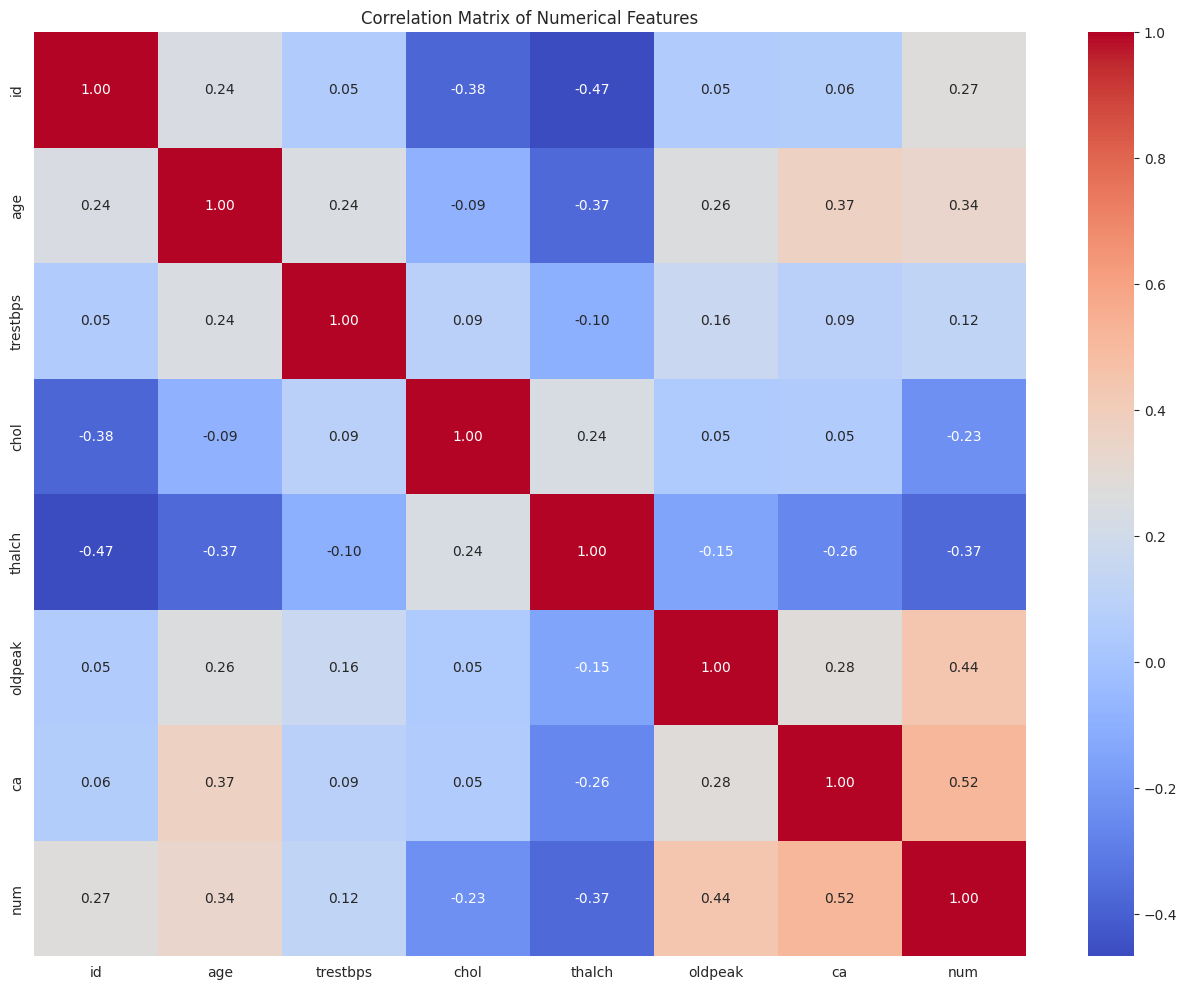

In [43]:
# Correlation Heatmap
plt.figure(figsize=(16, 12))
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Step 3: Data Preprocessing
Even though the data is clean, we need to prepare it for our models. This involves:
1.  **Separating features (X) and target (y).**
2.  **Identifying categorical features** that need to be encoded.
3.  **One-Hot Encoding** categorical features to convert them into a numerical format.
4.  **Scaling numerical features** so they are on a similar scale.

Theoretical Concept: Manual Approach with Scikit-Learn

Instead of using a Pipeline, we can manually handle each step of the machine learning workflow. This involves explicitly applying preprocessing, splitting data, scaling, encoding, model training, and evaluation in sequence. Each step must be carefully managed to ensure the model is trained correctly and no data leakage occurs.

Why use Manual Approach?

Transparency & Learning:
Performing preprocessing and modeling manually helps in understanding how each step works. This approach is especially useful for beginners or for academic projects where conceptual clarity is important.

Full Control:
Since every operation is performed step by step, we can customize the workflow easily (e.g., applying different scaling methods to different columns, handling missing values differently, etc.).

Flexibility:
Without being tied to a predefined pipeline structure, we can experiment more freely with different preprocessing techniques and models.

**Advantages of the Manual Approach**

&bull; Easier to debug because every step is explicit.

&bull; Helpful for learning, since it makes you aware of all the preprocessing steps.

&bull; Provides maximum flexibility for custom workflows.

**Limitations Compared to Pipelines**

&bull; Risk of Data Leakage: If transformations (e.g., scaling, encoding) are fit on the whole dataset before splitting, information from the test set might leak into training. This must be avoided by fitting preprocessing steps only on the training data.

&bull; Verbose Code: Writing and maintaining preprocessing + training code becomes longer and less clean.

&bull; Harder Hyperparameter Tuning: Without pipelines, tuning multiple steps together using cross-validation becomes more complex.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Step 1: Defining Features & Target
X = df.drop('num', axis=1)
y = df['num']

# Dropping non-feature columns
X = X.drop(['id', 'dataset'], axis=1)

# Step 2: Splitting into Train & Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 3: Separating Numerical & Categorical Features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical_features   = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

X_train_num = X_train[numerical_features]
X_test_num  = X_test[numerical_features]

X_train_cat = X_train[categorical_features]
X_test_cat  = X_test[categorical_features]

# Step 4: Handling Missing Values
# Numerical
num_imputer = SimpleImputer(strategy='mean')
X_train_num = num_imputer.fit_transform(X_train_num)
X_test_num  = num_imputer.transform(X_test_num)

# Categorical
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train_cat = cat_imputer.fit_transform(X_train_cat)
X_test_cat  = cat_imputer.transform(X_test_cat)

# Step 5: Scaling & Encoding
# Scaling numerical features
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train_num)
X_test_num  = scaler.transform(X_test_num)

# Encoding categorical features
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
X_train_cat = encoder.fit_transform(X_train_cat).toarray()
X_test_cat  = encoder.transform(X_test_cat).toarray()

# Step 6: Combining Processed Data
X_train_final = np.hstack((X_train_num, X_train_cat))
X_test_final  = np.hstack((X_test_num, X_test_cat))



### Step 4: Model Building & Training


#### **Theoretical Concept: Classification Models**

Let's dive into more detail on the classification models we are using:

*   **Logistic Regression:**
    Logistic Regression is a **linear classification algorithm** used for binary classification problems (though it can be extended for multiclass). Despite the name "regression," it's a classification method. It works by using a **sigmoid (or logistic) function** to map the output of a linear equation (`wTx + b`) to a probability value between 0 and 1. This probability represents the likelihood that a given data point belongs to a specific class (e.g., the positive class). A threshold (commonly 0.5) is then applied to these probabilities to assign the class label. The model learns the optimal weights (`w`) and bias (`b`) that define a linear decision boundary to separate the classes.

*   **Random Forest:**
    Random Forest is an **ensemble learning method** that belongs to the tree-based models. It builds a large number of **decision trees** during training. Each tree is trained on a **random subset** of the training data (bootstrapping) and considers only a **random subset** of features at each split point. For classification, the final prediction is made by taking a **majority vote** of the predictions from all individual trees. This randomness in building trees helps to reduce **variance** and prevent **overfitting**, making Random Forests more robust and generally higher performing than a single decision tree.

*   **Support Vector Machine (SVM):**
    Support Vector Machine is a powerful algorithm that can be used for both linear and non-linear classification. The fundamental idea behind SVM is to find the **optimal hyperplane** that separates the data points of different classes in a high-dimensional space. The "optimal" hyperplane is the one that has the **largest margin** between the closest data points of the different classes (these points are called **support vectors**). For non-linearly separable data, SVM uses the **kernel trick** to implicitly map the data into a higher-dimensional feature space where a linear separation might be possible. Common kernels include the linear kernel, polynomial kernel, and Radial Basis Function (RBF) kernel.

*   **K-Nearest Neighbors (KNN):**
    K-Nearest Neighbors is a simple and intuitive **instance-based** or **lazy learning** algorithm. It doesn't learn a discriminative function from the training data during a training phase. Instead, it memorizes the training dataset. To classify a new, unseen data point, it calculates the **distance** (e.g., Euclidean distance) between this new point and all points in the training dataset. It then identifies the **'k' nearest data points**. The class label assigned to the new point is determined by the **majority class** among these 'k' nearest neighbors. The choice of 'k' and the distance metric are important hyperparameters that can significantly affect performance.

#### 4.1 Model 1: Logistic Regression


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression


# Assuming your dataset is df and target column is 'target'
X = df.drop("num", axis=1)
y = df["num"]

# Separate categorical and numerical columns
categorical_features = [col for col in X.columns if X[col].dtype == 'object']
numerical_features = [col for col in X.columns if X[col].dtype != 'object']

# 1. Handle missing values
# Numerical: mean imputation
imputer_num = SimpleImputer(strategy="mean")
X[numerical_features] = imputer_num.fit_transform(X[numerical_features])

# Categorical: most frequent imputation
imputer_cat = SimpleImputer(strategy="most_frequent")
X[categorical_features] = imputer_cat.fit_transform(X[categorical_features])

# 2. One-hot encode categorical features
encoder = OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_features])

# Convert encoded categorical features to DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features))

# Combine numerical + encoded categorical
X_final = pd.concat([X[numerical_features].reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# 4. Scale numerical features (after encoding)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

#### 4.2 Model 2: Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### 4.3 Model 3: Support Vector Machine (SVM)

In [47]:
from sklearn.svm import SVC
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

#### 4.4 Model 4: K-Nearest Neighbors (KNN)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

### Step 5: Model Evaluation

In [49]:
from sklearn.metrics import classification_report

# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

# Evaluation
print("--- Logistic Regression Performance ---")
print(classification_report(y_test, y_pred_lr, zero_division=0))

print("\n--- Random Forest Performance ---")
print(classification_report(y_test, y_pred_rf, zero_division=0))

print("\n--- Support Vector Machine (SVM) Performance ---")
print(classification_report(y_test, y_pred_svm, zero_division=0))

print("\n--- K-Nearest Neighbors (KNN) Performance ---")
print(classification_report(y_test, y_pred_knn, zero_division=0))

--- Logistic Regression Performance ---
              precision    recall  f1-score   support

           0       0.68      0.87      0.76        75
           1       0.51      0.54      0.52        54
           2       0.21      0.12      0.15        25
           3       0.20      0.12      0.15        26
           4       0.00      0.00      0.00         4

    accuracy                           0.54       184
   macro avg       0.32      0.33      0.32       184
weighted avg       0.48      0.54      0.50       184


--- Random Forest Performance ---
              precision    recall  f1-score   support

           0       0.75      0.95      0.84        75
           1       0.64      0.59      0.62        54
           2       0.50      0.44      0.47        25
           3       0.44      0.27      0.33        26
           4       0.00      0.00      0.00         4

    accuracy                           0.66       184
   macro avg       0.46      0.45      0.45       184
we

**Evaluation Insights:** The Random Forest Classifier performs best, achieving 66% accuracy and a weighted F1-score of 0.63, outperforming Logistic Regression, SVM, and KNN. All models predict class 0 well, but minority classes (2, 3, 4) remain challenging, with class 4 not predicted at all. Random Forest shows improved recall and precision for classes 1–3, highlighting its robustness with manually preprocessed data.

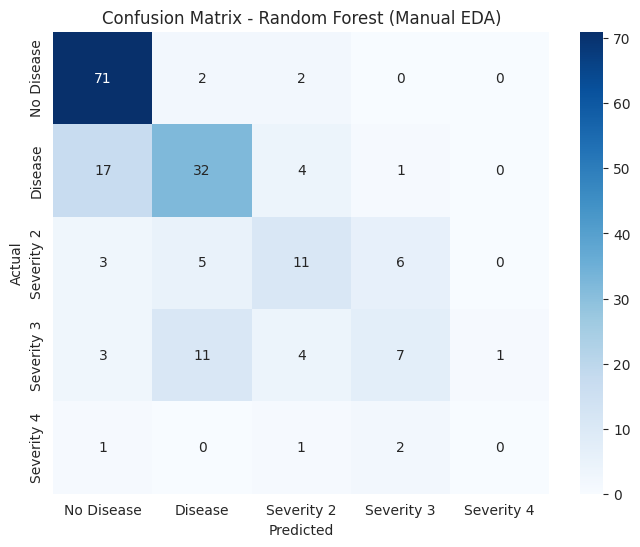

In [50]:
# Visualize the confusion matrix for the best model (Random Forest)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions from Random Forest
y_pred_best = y_pred_rf  # Random Forest predictions

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease', 'Severity 2', 'Severity 3', 'Severity 4'],
            yticklabels=['No Disease', 'Disease', 'Severity 2', 'Severity 3', 'Severity 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (Manual EDA)')
plt.show()


**Insights:**

Class 0 (No Disease): The model is very good at correctly identifying patients without heart disease, with a high number of true positives.

Class 1 (Disease): The model also performs reasonably well in identifying patients with heart disease, although there are some false positives and false negatives.

Minority Classes (2, 3, 4): The model struggles significantly with predicting the less frequent classes (representing different severities of heart disease). There are very few true positives for these classes, and many instances are misclassified, primarily as Class 0 or Class 1. Class 4 is not predicted at all.

In summary, the Random Forest model is effective at distinguishing between the presence and absence of heart disease but has difficulty differentiating between the various severity levels.

### Step 6: Feature Importance (Manual EDA)


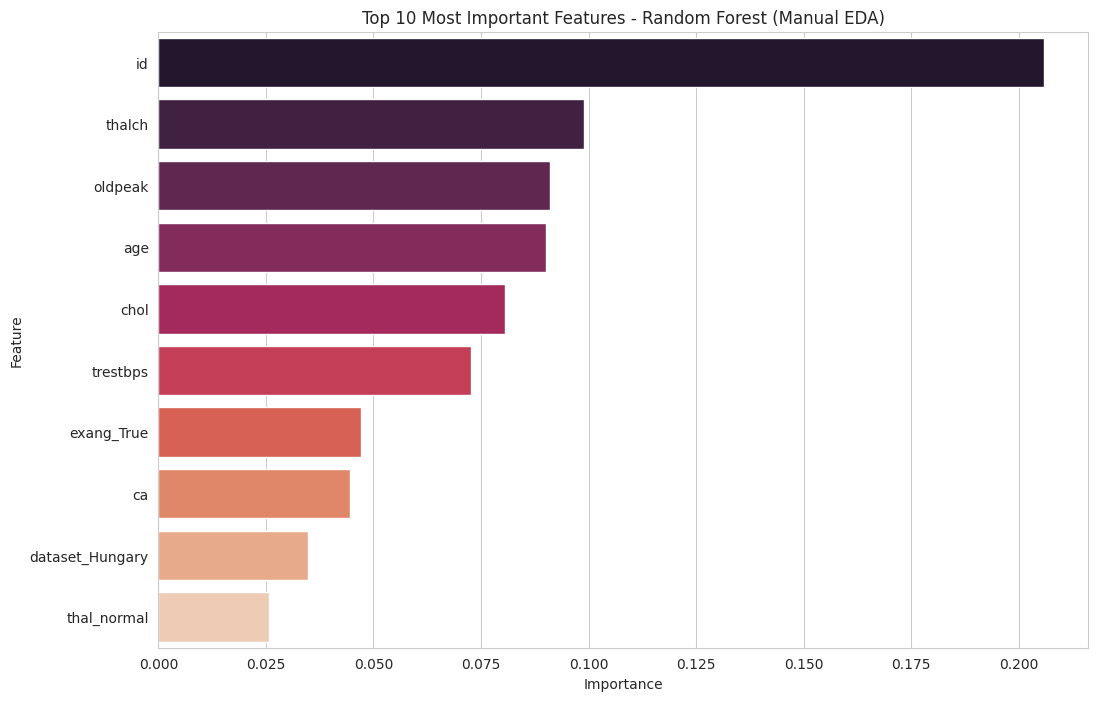

In [51]:
# Get feature names after preprocessing (numerical + encoded categorical)
num_features = numerical_features
cat_features = encoder.get_feature_names_out(categorical_features)
all_features = np.concatenate([num_features, cat_features])

# Get feature importances from trained Random Forest
importances = rf_model.feature_importances_

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
})

# Sort and pick top 10
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='rocket', hue='Feature', legend=False)
plt.title('Top 10 Most Important Features - Random Forest (Manual EDA)')
plt.show()


**Insights:**

&bull; **Unexpected Importance:** id and the dataset origin are surprisingly high in importance, which might need further investigation for potential data issues.

&bull; **Medically Relevant Features:** Expected features like maximum heart rate (thalch), ST depression (oldpeak), age, cholesterol, and resting blood pressure (trestbps) are also among the top predictors.

&bull; **Other Key Indicators:** Exercise-induced angina (exang_True) and the number of major vessels (ca) are also important.
Overall, while many expected medical factors are important, the prominence of id and dataset suggests a need to double-check the data for any potential biases or data leakage.

### Step 7: Conclusion

In this project, we built classification models to predict heart disease using a manual EDA preprocessing approach.

**Key Steps Undertaken:**

1. **Established the goal of classification:** Predicting the presence and severity of heart disease across 5 classes (0–4).

2. **Performed detailed EDA:** Identified key features such as age, maximum heart rate, cholesterol, and chest pain type. Checked for missing values and data imbalances, and visualized relationships between features and the target.

3. **Manual data preprocessing:** Handled missing values using mean imputation for numerical features and most frequent value for categorical features. Categorical features were one-hot encoded, and numerical features were scaled using StandardScaler.

4. **Built and trained multiple models:** Trained Logistic Regression, Random Forest, SVM, and KNN using the manually preprocessed data. Random Forest emerged as the best-performing model.

5. **Evaluated models with metrics:** Assessed precision, recall, F1-score, and accuracy. Random Forest achieved the highest accuracy (66%) and performed better on minority classes than the other models. Minority classes (especially class 4) remained challenging across all models.

6. **Analyzed feature importance:** For Random Forest, extracted and visualized the top 10 features contributing to predictions. Key medical features like maximum heart rate, age, and cholesterol were most important, with some unexpected importance from features like id and dataset, suggesting potential biases or data leakage considerations.

This workflow demonstrates the effectiveness of manual EDA in machine learning projects, showing how careful preprocessing and feature handling can impact model performance. While Random Forest performed best, further improvements such as addressing class imbalance and re-evaluating feature selection could enhance predictions, particularly for the rarer severity classes.